# VODAFONE CLASSIFICATION AND PREDICTING CUSTOMER CHURN PROJECT

## Introduction

### Customer churn is a big concern for many organisations and companies in business today. This project is designed to analyze the probability of customers leaving the organization, identify crucial indicators of churn, and propose actionable retention strategies to mitigate this issue.

### **Description;** The aim of this project is to build a robust machine learning pipeline to predict whether certain customers will churn from the organization or not. Predictive modeling will be done after deep analysis of the dataset provided by the marketing team. 


#  **The Hypothesis**


### **Null Hypothesis:** The monthly subscription cost  has no significant effect on customer churn (Churn) from Vodafone. 

### **Alternative Hypothesis:** The monthly subscription cost  has a significant effect on customer churn (Churn) from Vodafone. 

## **The Analytical Questions**

### 1. Do senior citizens have a higher or lower likelihood of churning compared to non-senior customers?
### 2. What is the relation between gender in predicting churn?
### 3. What is the distribution of churn across different types of contracts (Month-to-month, One year, Two years)?
### 4. How does the tenure of customers relate to the likelihood of churn?
### 5. How does the method of payment impact customer churn?




# Data Understanding

### 1. Importing the relevant libraries and modules

In [3]:
import pyodbc 
from dotenv import dotenv_values 
import re
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# importing visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import joblib
import os 


In [6]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
database = environment_variables.get("DATABASE")


#connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [7]:
# Establish a connection to the database using the provided connection string.
connection = pyodbc.connect(connection_string)

### 2. Loading data

In [8]:
#load the first data
query = "Select * from dbo.LP2_Telco_churn_first_3000"
df1 = pd.read_sql(query, connection)

In [9]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [11]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# Load the second data
df2= pd.read_csv('LP2_Telco-churn-second-2000.csv')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [14]:
# Load the test data
data_test  = pd.read_excel('Telco-churn-second-2000.xlsx')

# Display  the DataFrame
data_test .head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [15]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [16]:
data_test['SeniorCitizen'] = data_test['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [17]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
data_test['TotalCharges'] = pd.to_numeric(data_test['TotalCharges'], errors='coerce')

### <b> 3. Exploratory Data Analysis

### Merging the first and second data sets

In [18]:
# Concatenate the first and second dataset
training_data = pd.concat([df1, df2], ignore_index=True)

# Verify the structure of the combined dataset
training_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [19]:
# inspecting the combined data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 



. The dataset contains information on 5043 customers with 21 columns.


. Columns have varied data types: object for categorical data, int64 for integers, and float64 for floating-point numbers.


. Some columns, such as MultipleLines, OnlineSecurity, and TotalCharges, have missing values.
Churn column has one missing value.



In [20]:
#Check shape of  dataset
training_data.shape

(5043, 21)

In [21]:
#Check for null values for Concatenated dataset
training_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

Columns with missing values include MultipleLines (269 missing), OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies (651 missing each), TotalCharges (5 missing), and Churn (1 missing).

In [22]:
# Check for duplicated rows if any 
training_data.duplicated().sum()

0

In [23]:
# check unique values
unique_values_per_column = training_data.apply(pd.unique)
print(unique_values_per_column)

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                        [True, False, No, Yes]
Dependents                                     [False, True, No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                   [False, True, Yes, No]
MultipleLines          [None, False, True, No, No phone service, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity      [False, True, None, No, Yes, No internet service]
OnlineBackup        [True, False, None, No, Yes, No internet service]
DeviceProtection    [False, True, None, No, Yes, No internet service]
TechSupport         [False, True, None, Yes, No, No internet service]
StreamingTV         [False, True, None, No, Yes, No internet service]
StreamingMovies     

In [24]:
# Display summary statistics for Concatenated dataset
training_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214
std,0.368857,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.775000
50%,0.000000,29.000000,70.550003
75%,0.000000,56.000000,90.050003
max,1.000000,72.000000,118.650002


. The dataset indicates that around 16.24% of customers are senior citizens, with an average tenure of approximately 32.58 months and an average monthly charge of about 65.09 units.

. Monthly charges exhibit notable variability, ranging from 18.40 to 118.65, suggesting diverse pricing plans among customers.

In [25]:
training_data.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


### <b> Issues with the data

### 1. Accuracy:

Standardize the representation of categorical values across all datasets. For instance, ensure that 'Yes' consistently corresponds to 'True' and 'No' corresponds to 'False' across all categorical columns.
Consider transforming these columns to ensure uniformity. 

### 2. Validity:

Convert the 'TotalCharges' column in the second and third datasets from the object data type to float to allow for numerical operations. This may involve handling any non-numeric characters that prevent direct conversion.
Use appropriate data cleaning techniques like astype() in Pandas or data transformation functions in other programming languages to convert data types.

### 3. Consistency:

Investigate and reconcile inconsistent values across categorical columns in the three datasets. It might involve identifying common categorical columns and ensuring uniformity of values within these columns.
Create mapping tables or dictionaries to transform inconsistent values into a consistent format across datasets.

### 4. Completeness:

For missing data in the Churn column and other columns in the first dataset, consider imputation techniques if the missing data isn't substantial. Imputation could involve using statistical measures like mean, median, or mode to fill in missing values.
Alternatively, if missing data is significant or systematic, evaluate the impact and consider collecting or sourcing that missing data if possible.

### <b>  Fixing data issues.

In [26]:
#drop customer ID.
del training_data['customerID']



Dropped the customer Id because I felt it was not important for our analysis

In [27]:
# Define a dictionary for mapping boolean and None values to more meaningful categories
new_cat_values_mapping = {
    'MultipleLines': {True: 'Yes', False: 'No'},
    'OnlineSecurity': {True: 'Yes', False: 'No'},
    'OnlineBackup': {True: 'Yes', False: 'No'},
    'DeviceProtection': {True: 'Yes', False: 'No'},
    'TechSupport': {True: 'Yes', False: 'No'},
    'StreamingTV': {True: 'Yes', False: 'No'},
    'StreamingMovies': {True: 'Yes', False: 'No'},
    'Churn': {True: 'Yes', False: 'No'},
    'Partner': {True: 'Yes', False: 'No'},
    'Dependents': {True: 'Yes', False: 'No'},
    'PaperlessBilling': {True: 'Yes', False: 'No'},
    'PhoneService': {True: 'Yes', False: 'No'}
    
}

# Use the replace method to map the categorical values in the DataFrame
training_data.replace(new_cat_values_mapping, inplace=True)

Replaced True with Yes and False with NO because I felt they meant the same thing and for consistency across the columns.

In [28]:
# check unique values
unique_values_per_column = training_data.apply(pd.unique)
print(unique_values_per_column)

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                       [None, No, Yes, No phone service]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                   [No, Yes, None, No internet service]
OnlineBackup                     [Yes, No, None, No internet service]
DeviceProtection                 [No, Yes, None, No internet service]
TechSupport                      [No, Yes, None, No internet service]
StreamingTV                      [No, Yes, None, No internet service]
StreamingMovies                  [No, Yes, None, No internet service]
Contract            

In [29]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
training_data['TotalCharges'] = pd.to_numeric(training_data['TotalCharges'], errors='coerce')

# Verify the data type after conversion
training_data['TotalCharges'].dtype, 

(dtype('float64'),)

> **Converting `SeniorCitizen` column's datatype to _object_**
> > - the data type for this columns is categorical

In [30]:
#Convert 'SeniorCitizen' to object in  dataset

training_data['SeniorCitizen'] = training_data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


In [31]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


### <b> Univariate Data analysis

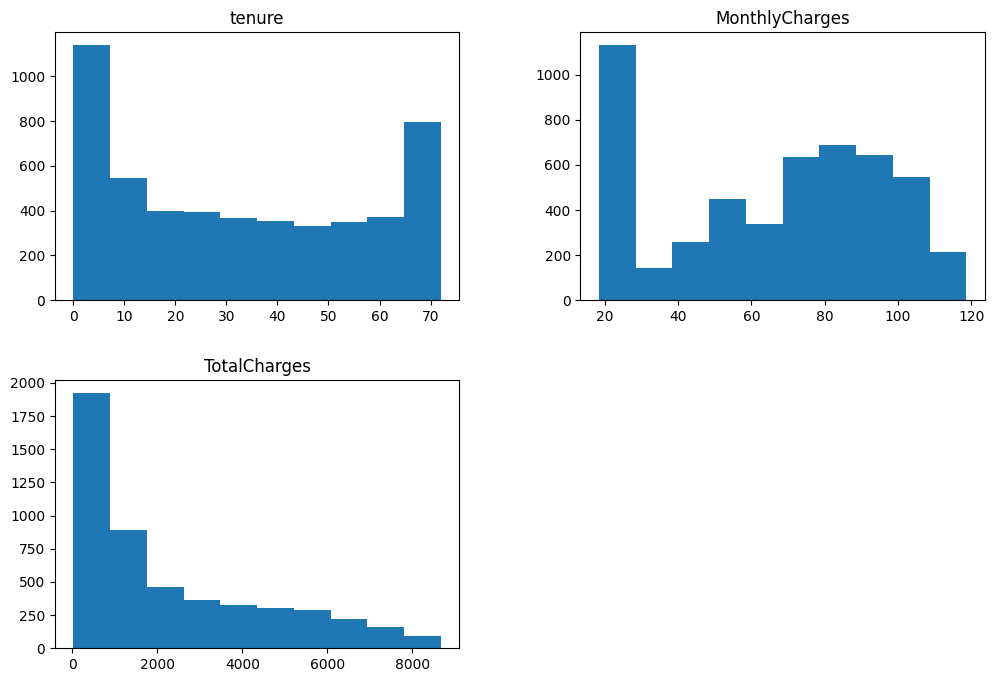

In [32]:
# Visualizing the distribution of Numerical Variables
training_data.hist(figsize=(12,8), grid= False)
plt.show()

.The number of users decrease as the total charges increase. They have an inverse proportionality relationship.

. The `Tenure` variable distribution shows that the number of users decreases as the number of years they have been using the company products/services increases up to 50 years where they then start increasing.

. Apart from the concentration of most users on the least monthly charges, the `MonthlyCharges` variable is almost normally distributed  



### Checking for outliers

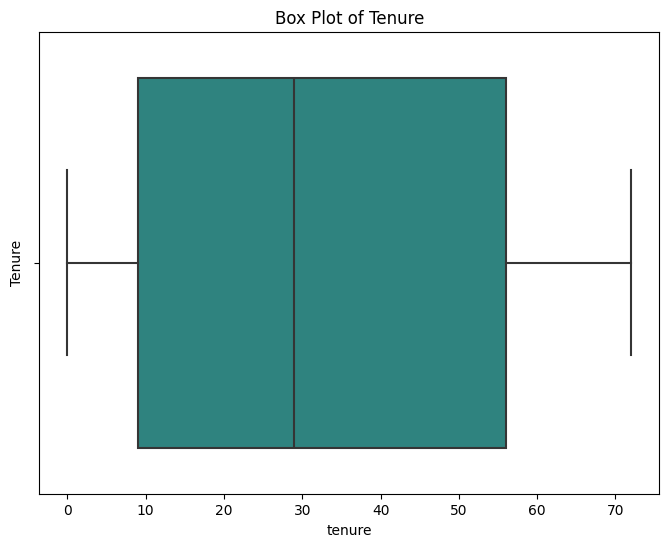

In [33]:

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'tenure' column
sns.boxplot(x=training_data['tenure'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of Tenure')
plt.ylabel('Tenure')

# Show the plot
plt.show()


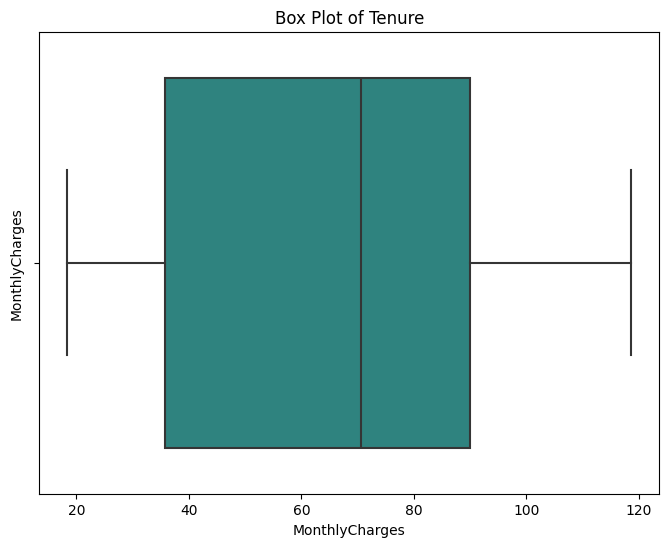

In [34]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'MonthlyCharges' column
sns.boxplot(x=training_data['MonthlyCharges'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of Tenure')
plt.ylabel('MonthlyCharges')

# Show the plot
plt.show()

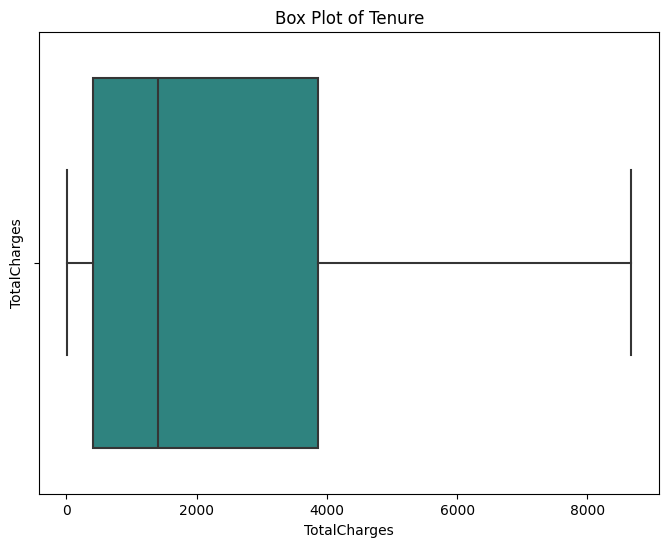

In [35]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'TotalCharges' column
sns.boxplot(x=training_data['TotalCharges'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of Tenure')
plt.ylabel('TotalCharges')

# Show the plot
plt.show()

. There seems to be no outliers on the numerical columns.

### Inspecting the distribution of categorical variables


**Univariate Analysis of Feature: gender**
count     5043
unique       2
top       Male
freq      2559
Name: gender, dtype: object

Unique Values and Counts:
gender
Male      2559
Female    2484
Name: count, dtype: int64

Missing Values: 0 (0.00%)


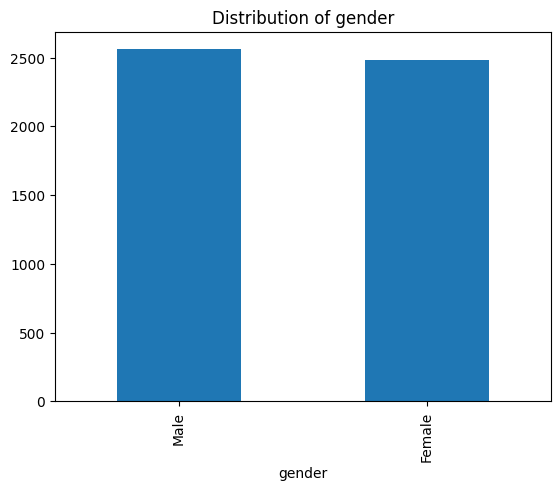


**Univariate Analysis of Feature: SeniorCitizen**
count     5043
unique       2
top         No
freq      4224
Name: SeniorCitizen, dtype: object

Unique Values and Counts:
SeniorCitizen
No     4224
Yes     819
Name: count, dtype: int64

Missing Values: 0 (0.00%)


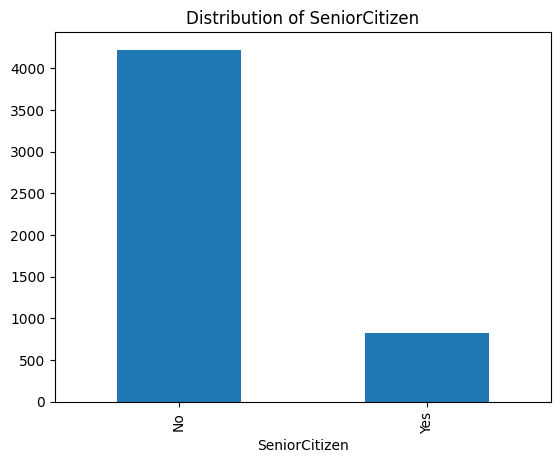


**Univariate Analysis of Feature: Partner**
count     5043
unique       2
top         No
freq      2585
Name: Partner, dtype: object

Unique Values and Counts:
Partner
No     2585
Yes    2458
Name: count, dtype: int64

Missing Values: 0 (0.00%)


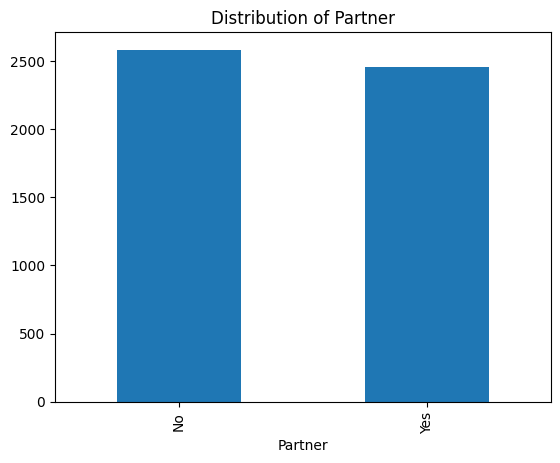


**Univariate Analysis of Feature: Dependents**
count     5043
unique       2
top         No
freq      3482
Name: Dependents, dtype: object

Unique Values and Counts:
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Missing Values: 0 (0.00%)


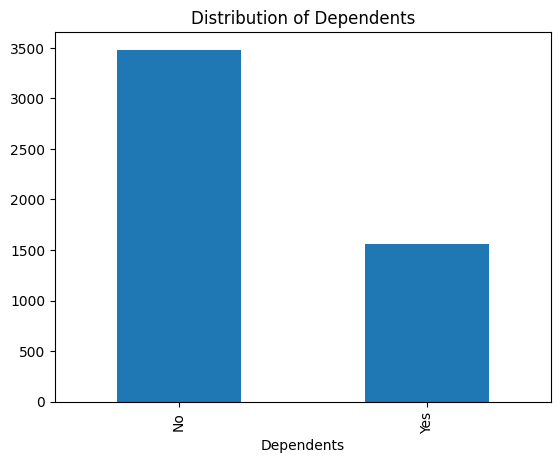


**Univariate Analysis of Feature: PhoneService**
count     5043
unique       2
top        Yes
freq      4554
Name: PhoneService, dtype: object

Unique Values and Counts:
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Missing Values: 0 (0.00%)


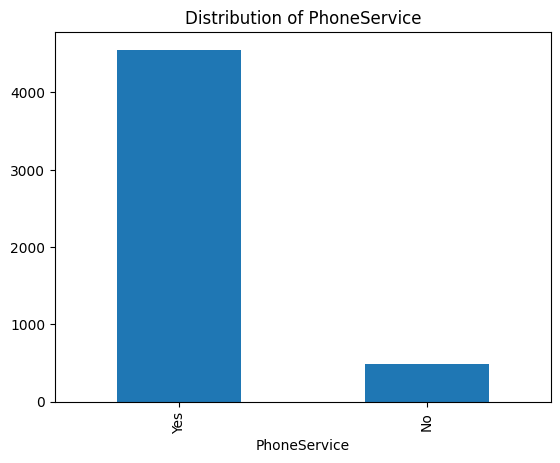


**Univariate Analysis of Feature: MultipleLines**
count     4774
unique       3
top         No
freq      2424
Name: MultipleLines, dtype: object

Unique Values and Counts:
MultipleLines
No                  2424
Yes                 2130
No phone service     220
Name: count, dtype: int64

Missing Values: 269 (5.33%)


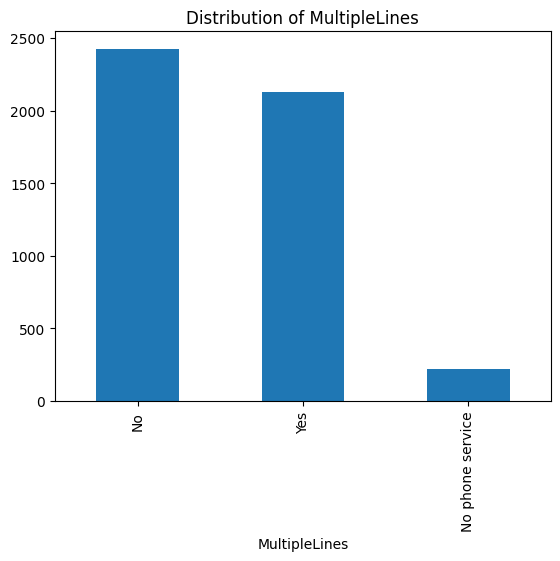


**Univariate Analysis of Feature: InternetService**
count            5043
unique              3
top       Fiber optic
freq             2248
Name: InternetService, dtype: object

Unique Values and Counts:
InternetService
Fiber optic    2248
DSL            1715
No             1080
Name: count, dtype: int64

Missing Values: 0 (0.00%)


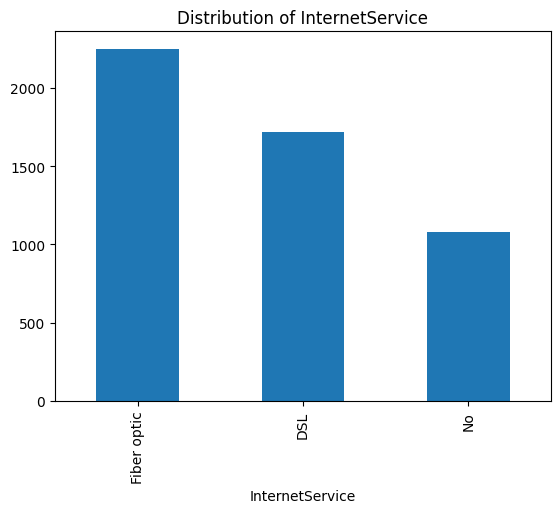


**Univariate Analysis of Feature: OnlineSecurity**
count     4392
unique       3
top         No
freq      2507
Name: OnlineSecurity, dtype: object

Unique Values and Counts:
OnlineSecurity
No                     2507
Yes                    1456
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


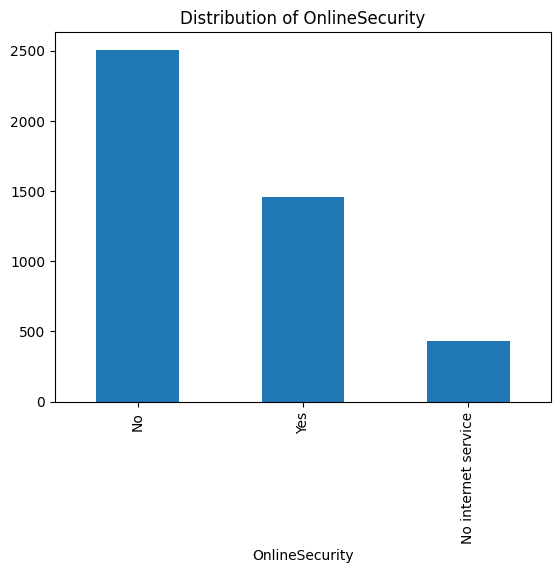


**Univariate Analysis of Feature: OnlineBackup**
count     4392
unique       3
top         No
freq      2231
Name: OnlineBackup, dtype: object

Unique Values and Counts:
OnlineBackup
No                     2231
Yes                    1732
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


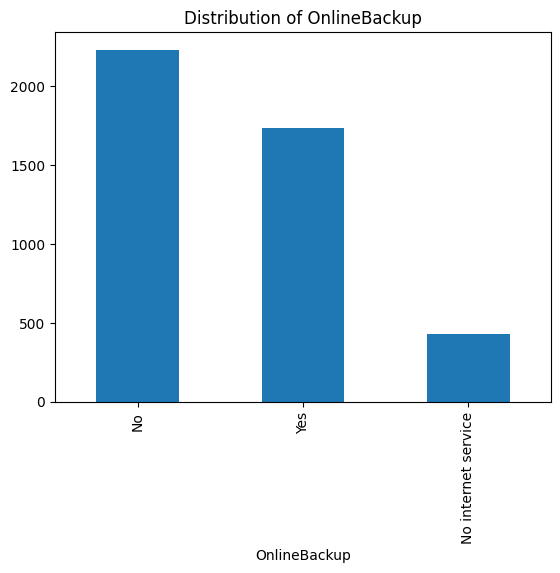


**Univariate Analysis of Feature: DeviceProtection**
count     4392
unique       3
top         No
freq      2219
Name: DeviceProtection, dtype: object

Unique Values and Counts:
DeviceProtection
No                     2219
Yes                    1744
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


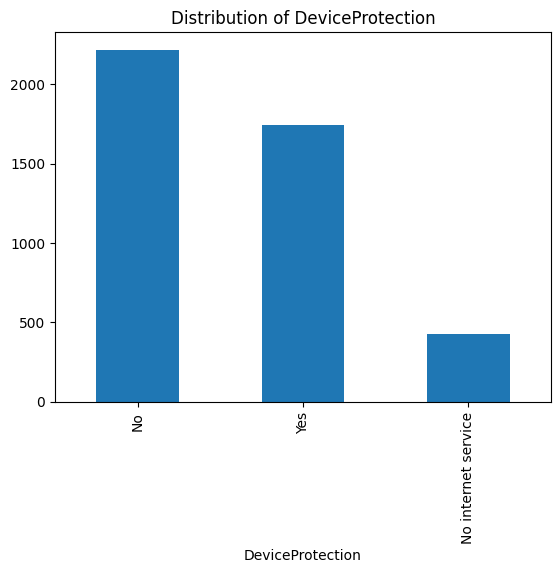


**Univariate Analysis of Feature: TechSupport**
count     4392
unique       3
top         No
freq      2472
Name: TechSupport, dtype: object

Unique Values and Counts:
TechSupport
No                     2472
Yes                    1491
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


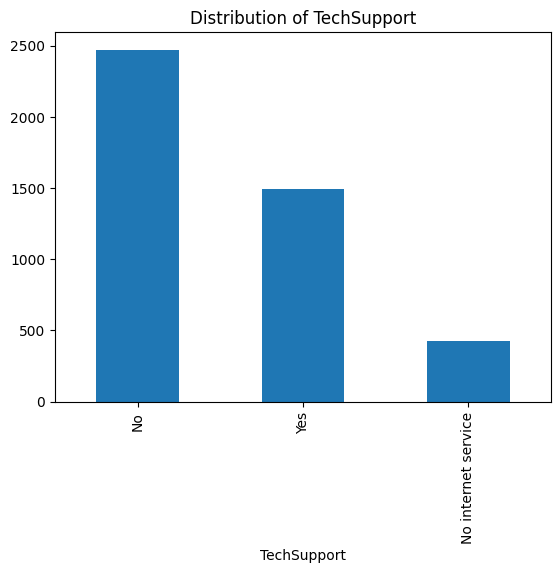


**Univariate Analysis of Feature: StreamingTV**
count     4392
unique       3
top         No
freq      2018
Name: StreamingTV, dtype: object

Unique Values and Counts:
StreamingTV
No                     2018
Yes                    1945
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


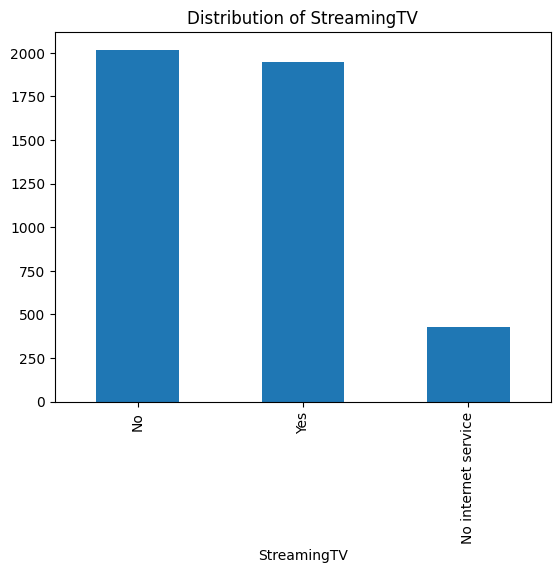


**Univariate Analysis of Feature: StreamingMovies**
count     4392
unique       3
top        Yes
freq      1982
Name: StreamingMovies, dtype: object

Unique Values and Counts:
StreamingMovies
Yes                    1982
No                     1981
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


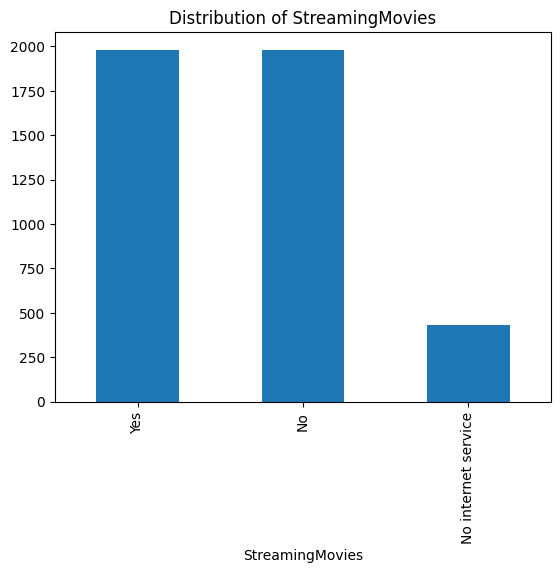


**Univariate Analysis of Feature: Contract**
count               5043
unique                 3
top       Month-to-month
freq                2744
Name: Contract, dtype: object

Unique Values and Counts:
Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64

Missing Values: 0 (0.00%)


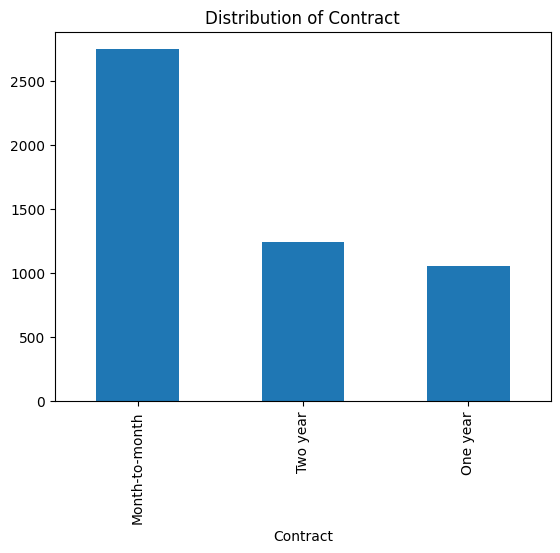


**Univariate Analysis of Feature: PaperlessBilling**
count     5043
unique       2
top        Yes
freq      2996
Name: PaperlessBilling, dtype: object

Unique Values and Counts:
PaperlessBilling
Yes    2996
No     2047
Name: count, dtype: int64

Missing Values: 0 (0.00%)


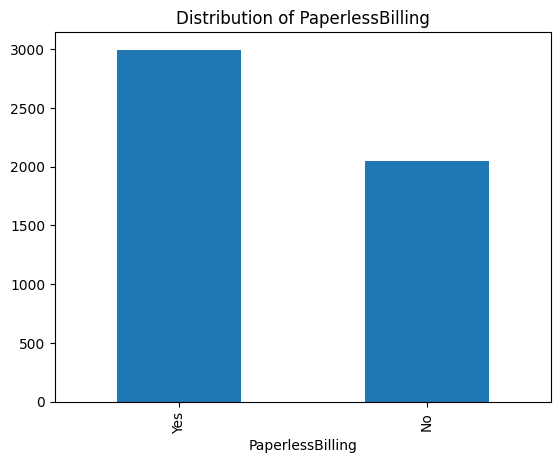


**Univariate Analysis of Feature: PaymentMethod**
count                 5043
unique                   4
top       Electronic check
freq                  1700
Name: PaymentMethod, dtype: object

Unique Values and Counts:
PaymentMethod
Electronic check             1700
Mailed check                 1128
Bank transfer (automatic)    1125
Credit card (automatic)      1090
Name: count, dtype: int64

Missing Values: 0 (0.00%)


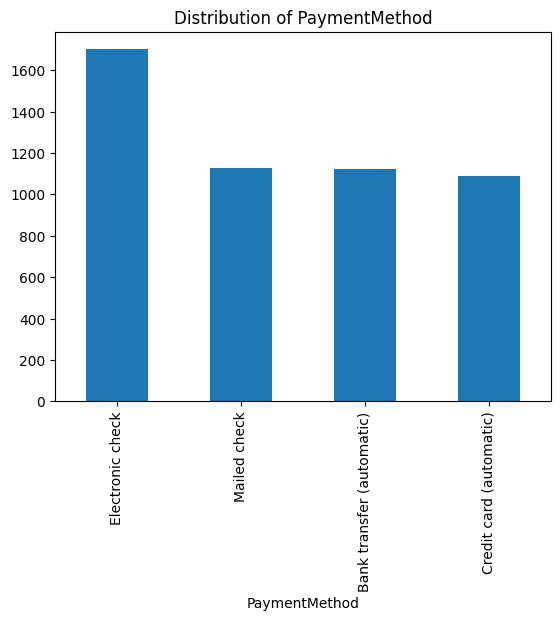


**Univariate Analysis of Feature: Churn**
count     5042
unique       2
top         No
freq      3706
Name: Churn, dtype: object

Unique Values and Counts:
Churn
No     3706
Yes    1336
Name: count, dtype: int64

Missing Values: 1 (0.02%)


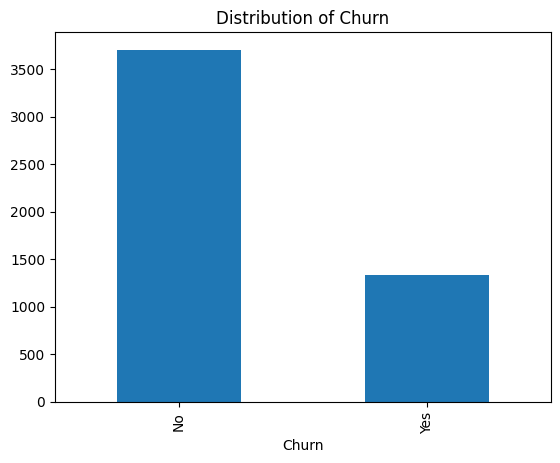

In [36]:


# List of categorical variables
categorical_features = list(training_data.select_dtypes(include=["object"]))

# Loop through each categorical variable
for feature in categorical_features:
    # Describe the feature
    print(f"\n**Univariate Analysis of Feature: {feature}**")
    print(training_data[feature].describe())

    # Print the number of unique values and their corresponding counts
    print("\nUnique Values and Counts:")
    print(training_data[feature].value_counts())

    # Calculate and print the percentage of missing values
    missing_values_count = training_data[feature].isnull().sum()
    missing_values_percentage = (missing_values_count / len(training_data)) * 100
    print(f"\nMissing Values: {missing_values_count} ({missing_values_percentage:.2f}%)")

    # Plot the distribution of the variable
    training_data[feature].value_counts().plot(kind="bar")
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}")
    plt.show()

### <b> Bivariate analysis

#### Comparing the distribution of of churn against the numerical variables

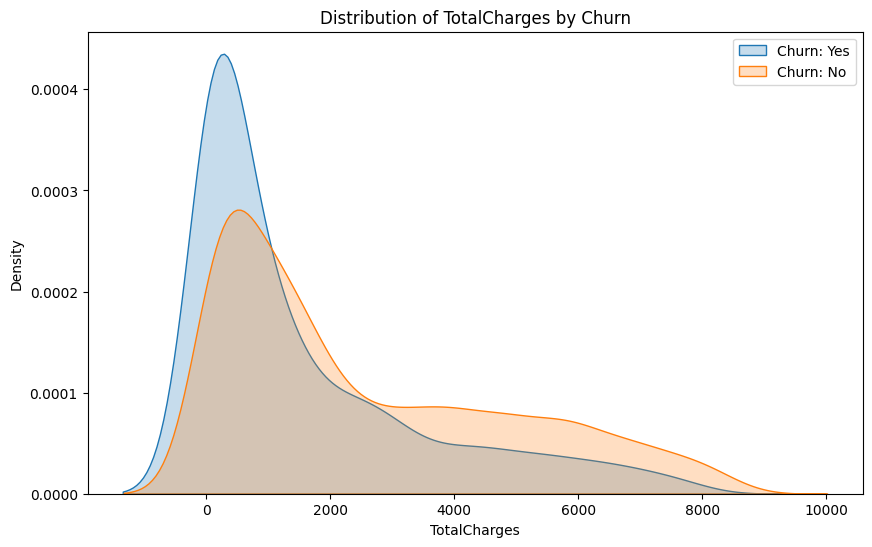

In [37]:
#Distribution of TotalCharges by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(training_data[training_data['Churn'] == 'Yes']['TotalCharges'], label='Churn: Yes', shade=True)
sns.kdeplot(training_data[training_data['Churn'] == 'No']['TotalCharges'], label='Churn: No', shade=True)

plt.title('Distribution of TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.legend()
plt.show()


. It seems that people with least totalcharges churn most. This number decreases as Total cost increases.

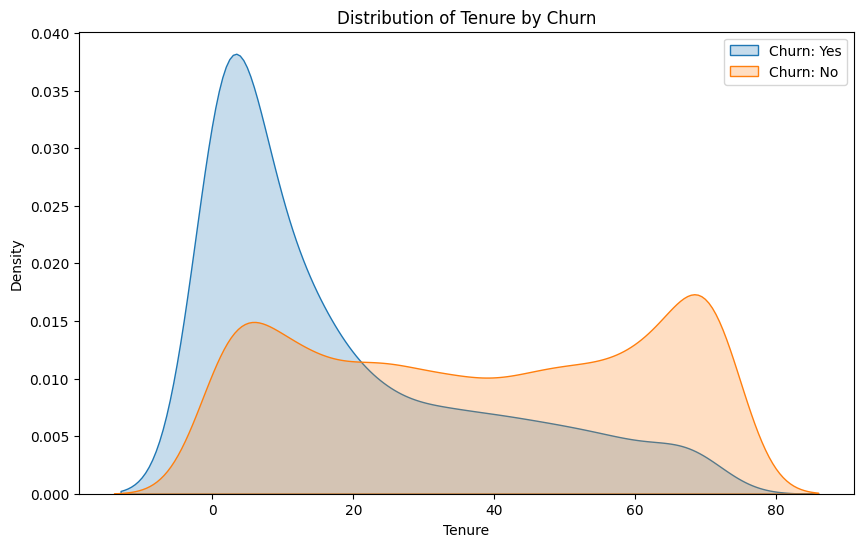

In [38]:
#Distribution of Tenure by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(training_data[training_data['Churn'] == 'Yes']['tenure'], label='Churn: Yes', shade=True)
sns.kdeplot(training_data[training_data['Churn'] == 'No']['tenure'], label='Churn: No', shade=True)

plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.show()


. The customer with tenure less than 30 churn more and this number decreases as tenure increases.

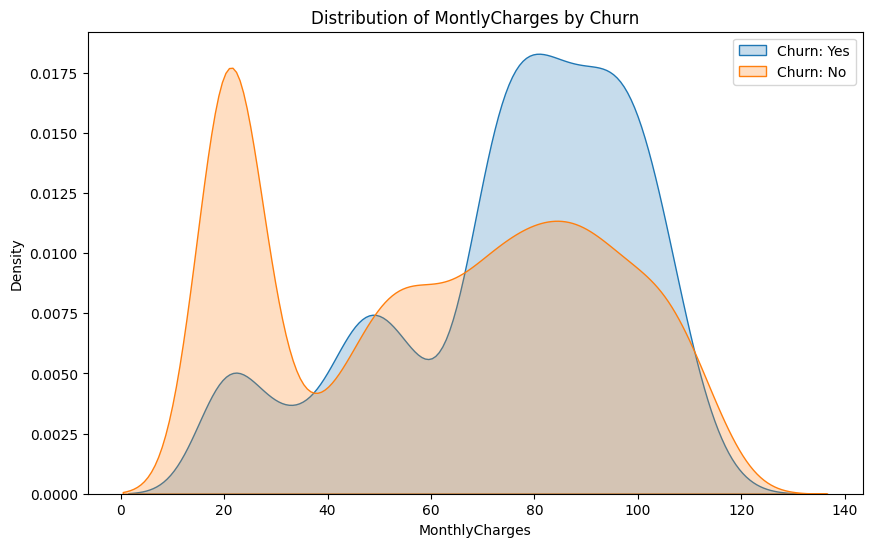

In [39]:
#Distribution of MontlyCharges by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(training_data[training_data['Churn'] == 'Yes']['MonthlyCharges'], label='Churn: Yes', shade=True)
sns.kdeplot(training_data[training_data['Churn'] == 'No']['MonthlyCharges'], label='Churn: No', shade=True)

plt.title('Distribution of MontlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.legend()
plt.show()


. Customers with high Monthly charges between 80 to around 120 churn more.

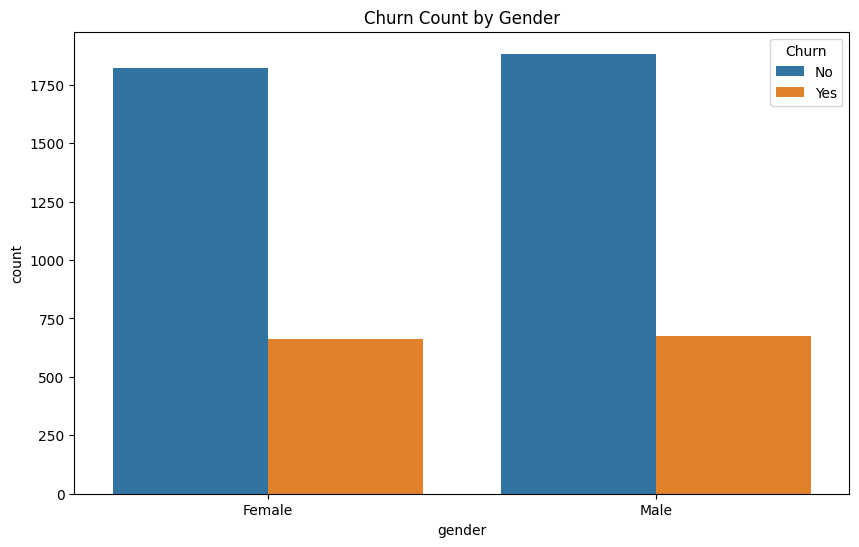

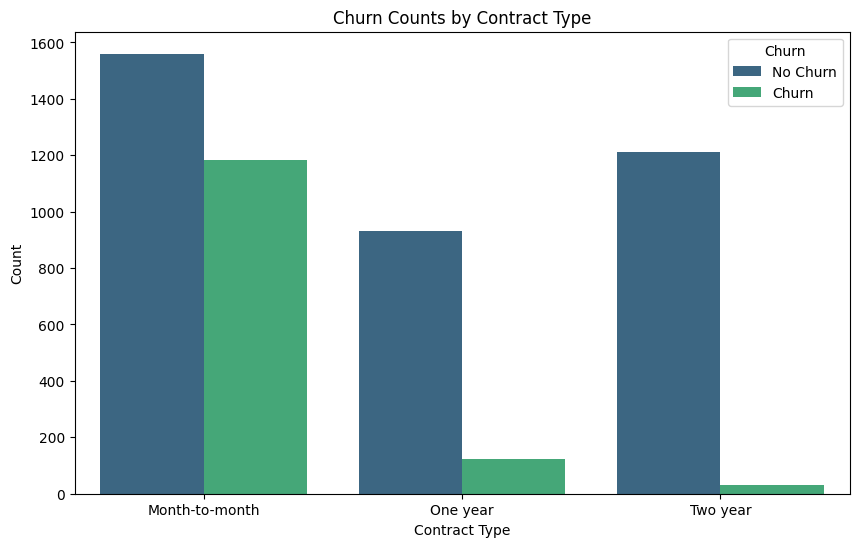

In [40]:
# Bivariate Analysis 1: Count of Churn by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=training_data)
plt.title('Churn Count by Gender')
plt.show()



# Bivariate Analysis 3:Bar Plot of Contract and Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=training_data, palette='viridis')

plt.title('Churn Counts by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()




.In gender the churn rate is almost same for both female and males with male leading.

.In contract type those in month to month tend to churn more

### <b> Multivariate Analysis

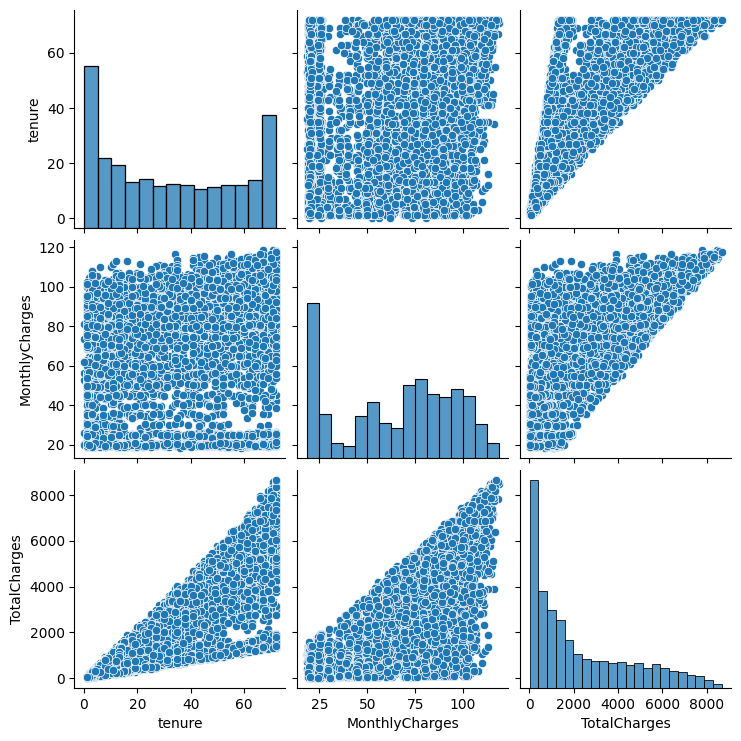

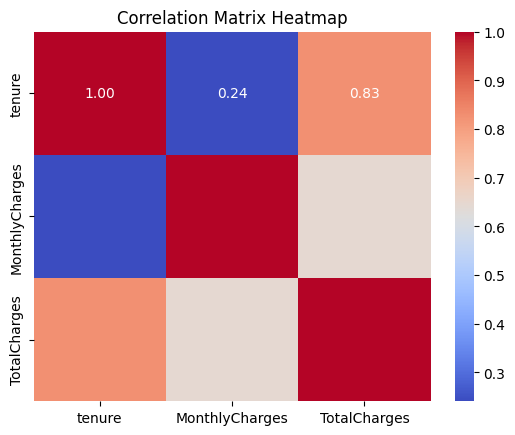

In [41]:

# Multivariate Analysis: Pair Plot (scatterplot matrix) for numeric variables
sns.pairplot(training_data[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()

# Multivariate Analysis: Heatmap for correlation matrix of numeric variables
correlation_matrix = training_data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()



Insights

' Strong positive correlation (approximately 0.83) exists between the tenure and TotalCharges variables, indicating that customers with longer service duration tend to have higher overall charges.

. A moderate positive correlation (around 0.65) between MonthlyCharges and TotalCharges suggests that customers facing higher monthly charges also tend to accumulate higher total charges.

. A lower positive correlation (approximately 0.24) between tenure and MonthlyCharges indicates a mild association, suggesting that as tenure increases, there is a slight tendency for monthly charges to rise.


### <b> Answering analytical questions

### 1. Do senior citizens have a higher or lower likelihood of churning compared to non-senior customers?

In [42]:
# Calculate the number of senior customers who churned
senior_churned_count = training_data[(training_data['SeniorCitizen'] == 'Yes') & (training_data['Churn'] == 'Yes')].shape[0]

# Calculate the number of non-senior customers who churned
non_senior_churned_count = training_data[(training_data['SeniorCitizen'] == 'No') & (training_data['Churn'] == 'Yes')].shape[0]

# Print the results
print(f"Number of senior customers who churned: {senior_churned_count}")
print(f"Number of non-senior customers who churned: {non_senior_churned_count}")


Number of senior customers who churned: 340
Number of non-senior customers who churned: 996


In [43]:

# Calculate the total number of senior and non-senior customers
total_senior = training_data[training_data['SeniorCitizen'] == 'Yes'].shape[0]
total_non_senior = training_data[training_data['SeniorCitizen'] == 'No'].shape[0]

# Calculate the percentage of senior and non-senior customers who churned
percentage_churned_senior = (senior_churned_count / total_senior) * 100
percentage_churned_non_senior = (non_senior_churned_count / total_non_senior) * 100

# Print the results
print(f"Percentage of senior customers who churned: {percentage_churned_senior:.2f}%")
print(f"Percentage of non-senior customers who churned: {percentage_churned_non_senior:.2f}%")


Percentage of senior customers who churned: 41.51%
Percentage of non-senior customers who churned: 23.58%


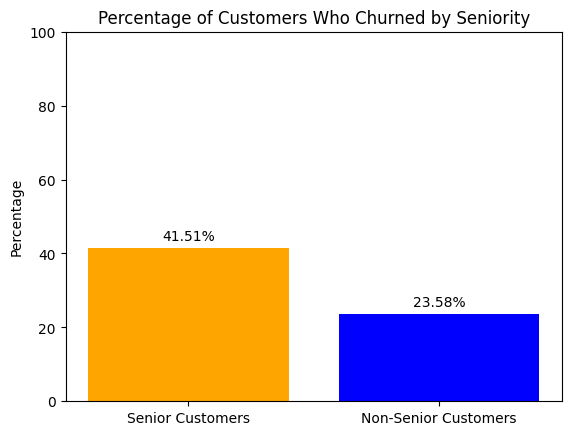

In [44]:
# Plot the results
labels = ['Senior Customers', 'Non-Senior Customers']
percentages = [percentage_churned_senior, percentage_churned_non_senior]

plt.bar(labels, percentages, color=['orange', 'blue'])
plt.title('Percentage of Customers Who Churned by Seniority')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Display the percentages on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center')

plt.show()


. The above implies that senior customers have a higher likelihood of churning compared to non-senior customers. 

.The churn rate among senior customers (41.51%) is higher than the churn rate among non-senior customers (23.58%). Therefore, based on the provided data, senior citizens have a higher likelihood of churning.







### 2. What is the relation between gender in predicting churn?

In [45]:
# Count the total number of churned customers
total_churned_count = training_data['Churn'].value_counts()['Yes']

# Count the number of churned customers by gender
churn_count_by_gender = training_data[training_data['Churn'] == 'Yes']['gender'].value_counts()

# Calculate the percentage of churned customers by gender
churn_percentage_by_gender = (churn_count_by_gender / total_churned_count) * 100
churn_percentage_by_gender

gender
Male      50.523952
Female    49.476048
Name: count, dtype: float64

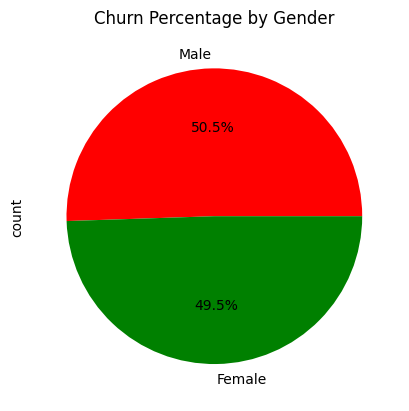

In [46]:

# Plot the pie chart
churn_percentage_by_gender.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Churn Percentage by Gender')

plt.show()


The results above indicate the percentage distribution of churned customers by gender. Specifically:

. Male customers account for approximately 50.52% of the total churned customers. Female customers account for approximately 49.48% of the total churned customers.
 
. This suggests that the churn distribution is relatively balanced between male and female customers, with a slightly higher percentage of churn observed among male customers.







### 3. What is the distribution of churn across different types of contracts (Month-to-month, One year, Two years)?

In [47]:


# Filter data for customers who churned
churned_data = training_data[training_data['Churn'] == 'Yes']

# Group churned data by Contract and calculate the count
contract_churned_counts = churned_data['Contract'].value_counts()
contract_churned_counts


Contract
Month-to-month    1184
One year           122
Two year            30
Name: count, dtype: int64

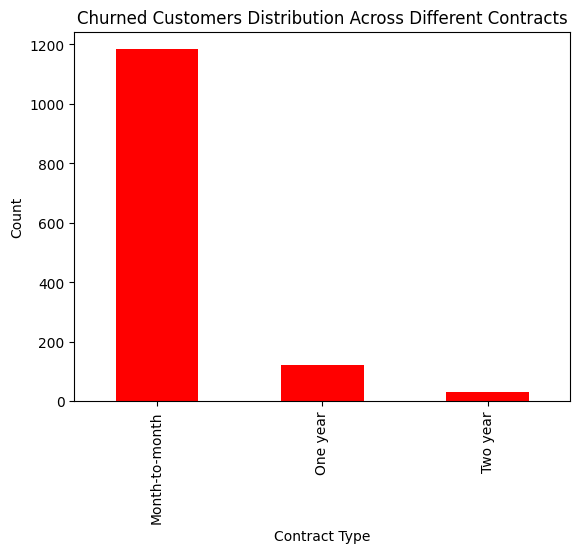

In [48]:

# Plot the bar plot
contract_churned_counts.plot(kind='bar', color='red')
plt.title('Churned Customers Distribution Across Different Contracts')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


. The results suggest that customers with a month-to-month contract are more likely to churn compared to those with longer-term contracts (one year or two years).

### 4. How does the tenure of customers relate to the likelihood of churn?

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'training_data' is your DataFrame
# Filter data for customers who churned
churned_data = training_data[training_data['Churn'] == 'Yes']

# Group by tenure and count churned customers
tenure_churn_counts = churned_data.groupby('tenure').size().reset_index(name='count_churned')
tenure_churn_counts


,tenure,count_churned
0,1,270
1,2,88
2,3,64
3,4,51
4,5,46
...,...,...
67,68,7
68,69,6
69,70,10
70,71,4


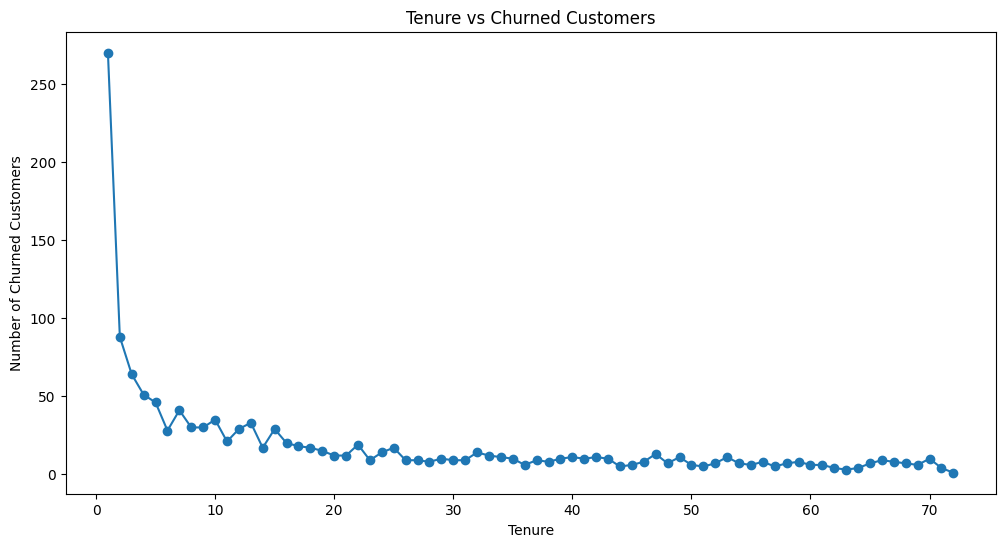

In [50]:
# Plotting  chart 
plt.figure(figsize=(12, 6))
plt.plot(tenure_churn_counts['tenure'], tenure_churn_counts['count_churned'], marker='o')
plt.xlabel('Tenure')
plt.ylabel('Number of Churned Customers')
plt.title('Tenure vs Churned Customers')

plt.show()


Observations

. Higher Churn at.the Beginning: The number of churned customers is relatively high in the early months of tenure (e.g., at 1 month).

. Decreasing Churn Over Time: As tenure increases, the number of churned customers generally decreases. This suggests that customers who stay with the service for a longer period are less likely to churn.

. Some Fluctuations: While there is a general trend of decreasing churn with longer tenure, there are some fluctuations in the middle tenure months.

. These observations are common in subscription-based services where customers may be more likely to churn shortly after subscribing and become more loyal over time. Understanding these patterns can help in developing strategies to retain customers, especially during the critical early months of their subscription

### 5. How does the method of payment impact customer churn?


In [51]:

# Filter data for customers who churned
churned_data = training_data[training_data['Churn'] == 'Yes']

# Count churn based on PaymentMethod
churn_by_payment = churned_data['PaymentMethod'].value_counts()
churn_by_payment



PaymentMethod
Electronic check             758
Mailed check                 212
Bank transfer (automatic)    198
Credit card (automatic)      168
Name: count, dtype: int64

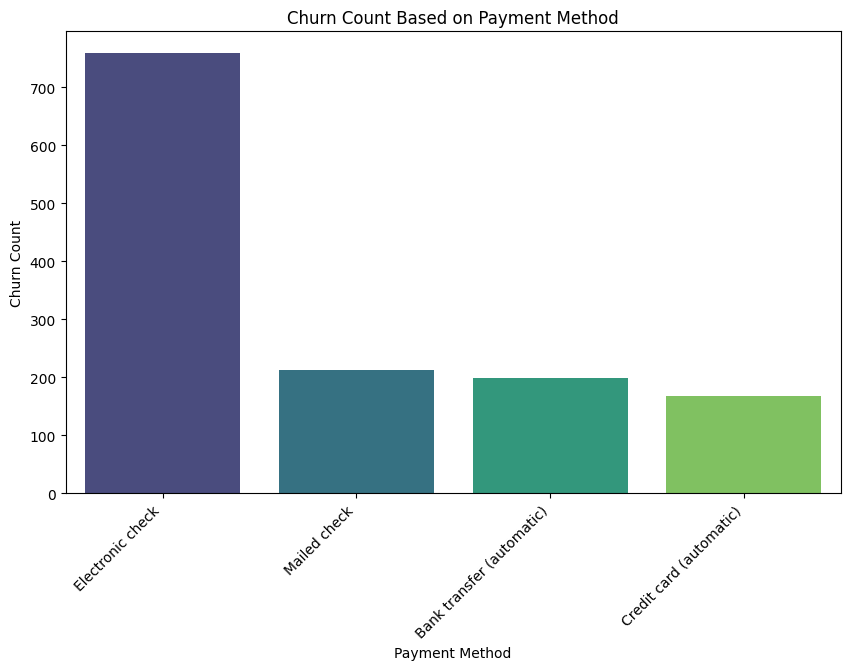

In [52]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, palette='viridis')
plt.xlabel('Payment Method')
plt.ylabel('Churn Count')
plt.title('Churn Count Based on Payment Method')
plt.xticks(rotation=45, ha='right')
plt.show()

. As seen above, Electronic check has the highest churn rate probably because  Electronic checks are associated with more immediate and flexible payment options, making it easier for customers to switch providers without the hassle of physical paperwork. Additionally, electronic check users may be more tech-savvy or open to exploring alternative services.

###  **Hypothesis Testing**


**Null Hypothesis:** The monthly subscription cost  has no significant effect on customer churn (Churn) from the Safari Network Service.. 

**Alternative Hypothesis:** The monthly subscription cost  has a significant effect on customer churn (Churn) from the Safari Network Service.. 

In [53]:

# Filter data for customers who churned and those who did not churn
churned = training_data[training_data['Churn'] == 'Yes']
non_churned = training_data[training_data['Churn'] == 'No']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(churned['MonthlyCharges'], non_churned['MonthlyCharges'], equal_var=False)

# Display the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Check significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: MonthlyCharges has a significant effect on customer churn.")
else:
    print("Fail to reject the null hypothesis: MonthlyCharges does not have a significant effect on customer churn.")

T-Statistic: 16.38602030072326
P-Value: 7.606640275756946e-58
Reject the null hypothesis: MonthlyCharges has a significant effect on customer churn.


Result Summary:
 
. The t-statistic of 16.37 indicates a substantial difference between the sample mean and the null hypothesis mean for the effect of monthly subscription cost on customer churn.

. The extremely low p-value (9.65e-58) provides strong evidence against the null hypothesis, leading to its rejection.

. Consequently, the analysis suggests a significant and practically relevant effect of monthly subscription cost on customer churn for the Safari Network Service.






## <b> Data Preparation


#### 1. Split the dataset into X and y test features

In [54]:
# Replace None values in the 'Churn' column with 'No'
training_data['Churn'] = training_data['Churn'].fillna('No')

In [55]:
X = training_data.drop('Churn', axis=1)
y = training_data['Churn']

#### 2. Split data set into training and evaluation sets

In [56]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Feature Processing and Engineering

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [58]:
# Separating input features into numeric and categorical for different pipelines
numeric_column = X.select_dtypes(include=['number']).columns
numeric_column

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [59]:
categorical_column = X.select_dtypes(include=['object']).columns
categorical_column

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [60]:

class LogTransformer:
    def __init__(self, constant=1e-5):
        self.constant = constant

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X + self.constant)

# Numeric pipeline
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),
    
])



# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

# Combine the numeric and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numeric_column),
    ('categorical_pipeline', categorical_pipeline, categorical_column),
])


### Label Encoding

In [61]:


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing set using the fitted label encoder
y_test_encoded = label_encoder.transform(y_test)




## <b> Evaluation

### <b> Machine Learning Pipeline - Unbalanced

#### Model 1: DecisionTreeClassifier

In [62]:

from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000024B5FBA9870>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

#### Model 2:  RandomForestClassifier

In [63]:

# Create a pipeline with preprocessor and RandomForestClassifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to the training data
random_forest_pipeline.fit(X_train, y_train_encoded)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000024B5FBA9870>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

 #### Model 3: KNeighborsClassifier

In [64]:


# Create a pipeline with preprocessor and KNeighborsClassifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train_encoded)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000024B5FBA9870>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

. Training different models on the same dataset provides a comprehensive understanding of the data and facilitates the selection of the most appropriate model based on performance metrics and  interpretability

 #### Model 4: Logistic Regression

In [65]:



# Create a pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline to the training data for Logistic Regression
logistic_regression_pipeline.fit(X_train, y_train_encoded)





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000024B5FBA9870>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

#### Model 5: Gaussian Naive Bayes

In [66]:
# Create a pipeline for Gaussian Naive Bayes
naive_bayes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Fit the pipeline to the training data for Gaussian Naive Bayes
naive_bayes_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000024B5FBA9870>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GaussianNB())])

### Comparing Models by CLassification reports - Unbalanced

In [67]:

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gaussian Naive Bayes':GaussianNB(),
}



In [68]:
# Create an empty DataFrame to store evaluation metrics for different models
unbalanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]


In [69]:
unbalanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.726462,0.729614,0.726462,0.727966
1,Random Forest,0.793855,0.783868,0.793855,0.785958
2,K Nearest Neighbors,0.766105,0.758341,0.766105,0.761375
3,Logistic Regression,0.798811,0.789178,0.798811,0.790940
4,Gaussian Naive Bayes,0.646184,0.795762,0.646184,0.663239


Summary:

. The Logistic Regression model has the highest accuracy (79.88%) and F1 Score (79.09%) among the models.

. Random Forest also performs well with a high accuracy of 79.39%.

. Gaussian Naive Bayes has the lowest accuracy (64.62%) and F1 Score (66.32%), indicating lower overall performance.

. In summary, the Logistic Regression model appears to be the best-performing model based on the provided metrics.







### Balance Dataset

In [70]:
y_train.value_counts()

Churn
No     2973
Yes    1061
Name: count, dtype: int64

. As you can see above the data is not balanced. No is the majority.

. Unbalanced data can lead to a bias in machine learning models toward the majority class, impacting overall performance.

. To address these challenges, various techniques can be employed, including: Resampling techniques (oversampling minority or undersampling majority class).

#### Balancing by Resampling by applying RandomOverSampler

In [71]:

#Balance data by oversampling

# Instantiate RandomOverSampler
sampler = RandomOverSampler(random_state=42)

# Fit and apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)


In [72]:
#checking if data is balanced
pd.DataFrame(y_train_resampled).value_counts()

0    2973
1    2973
Name: count, dtype: int64

. The reasons I chose Oversampling is, Oversampling addresses the scarcity of examples in the minority class of small datasets by creating additional instances, enhancing the model's exposure to meaningful patterns.

.  Oversampling maintains the integrity of the original features, preventing loss of valuable information during the modeling process.

##### Check the classification reports after balancing data to see if the there is some improvement on the models.


In [73]:

    
# Create an empty DataFrame to store evaluation metrics for different models
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
     # Fit the pipeline to the training data (resampled)
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    balanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

In [74]:
balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
5,Gaussian Naive Bayes,0.632309,0.792941,0.632309,0.649032


Insights

. Decision Tree:After balancing, accuracy improved from 72.65% to 76.91%, with minor enhancements in precision, recall, and F1 score.

. Random Forest:Balancing led to a slight drop in accuracy from 79.39% to 78.39%. Other metrics remained relatively stable.

. K Nearest Neighbors:Significant improvement after balancing, with accuracy increasing from 76.61% to 66.60%. Precision, recall, and F1 score also saw notable changes.

. Logistic Regression:Balancing resulted in a decrease in accuracy from 79.88% to 75.32%. However, precision and recall improved, leading to a similar F1 score.

.Gaussian Naive Bayes:Balancing had a positive impact, with accuracy rising from 64.62% to 63.23%. Precision and F1 score also experienced slight improvements.

.However, Random Forest remains the top-performing model after balancing, with relatively stable metrics.

### Balancing data using SMOTE, training it and comparing results

In [75]:

# Initialize an empty DataFrame to store results
smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Iterate over each model and apply SMOTE during training
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing, SMOTE, and the classifier
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_test)
    
    # Calculate classification metrics using classification_report
    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    # Extract relevant metrics
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    
    # Append the results to the DataFrame
    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print the results DataFrame
print(smote_df)



             Model_name  Accuracy  Precision    Recall  F1_Score
0         Decision Tree  0.739346   0.748379  0.739346  0.743247
1         Random Forest  0.798811   0.796002  0.798811  0.797258
2   K Nearest Neighbors  0.675917   0.744065  0.675917  0.692792
3   Logistic Regression  0.764123   0.810215  0.764123  0.775123
4  Gaussian Naive Bayes  0.658077   0.796629  0.658077  0.675330


Summary:

1. **Before SMOTE:**
   - Random Forest consistently performed the best with the highest accuracy (0.794) and F1 score (0.786).
   - Logistic Regression and Decision Tree also showed competitive performance.

2. **After SMOTE:**
   - Random Forest maintained its strong performance with an accuracy of 0.799 and an improved F1 score of 0.797.
   - Logistic Regression and Decision Tree also exhibited slight improvements.
   - K Nearest Neighbors and Gaussian Naive Bayes, although improved, still lag behind in performance.

3. **Overall:**
   - Random Forest remains the top-performing model after applying SMOTE, demonstrating robustness to class imbalance.
  


### Feature importance and Selection

In [76]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.786262,0.372844,-0.334824,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.176276,-1.337025,-0.213806,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.420774,-1.118993,0.049529,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.173264,0.136479,0.107751,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.590951,-0.468171,-1.544861,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,0.176276,-0.368753,0.164324,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4030,0.429774,0.397437,0.694074,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4031,-0.786262,-1.313914,-1.010201,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4032,0.472791,0.160393,0.624036,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [77]:

# Feature selection using SelectKBest
selection = SelectKBest(mutual_info_classif, k=30)
fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipeline ={}

for model_name, classifier in models.items():
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])
    
    pipeline.fit(X_train, y_train_encoded)

    all_pipeline[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)
    
    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']
    
    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]


In [78]:
fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.711596,0.730699,0.711596,0.719092
1,Random Forest,0.788900,0.785080,0.788900,0.786742
2,K Nearest Neighbors,0.705649,0.750844,0.705649,0.718845
3,Logistic Regression,0.756194,0.810277,0.756194,0.768230
4,Gaussian Naive Bayes,0.722498,0.803212,0.722498,0.737523


**Summary of Model Performance**
when you compare Smote result and Feature importance

1. **Decision Tree:**
   - SMOTE resulted in improved accuracy (73.93%) and F1 score (74.32%) compared to feature selection.

2. **Random Forest:**
   - Similar performance between feature selection and SMOTE, with slightly higher accuracy and slightly lower F1 score for SMOTE (Accuracy: 79.88%, F1 Score: 79.73%).

3. **K Nearest Neighbors:**
   - Feature selection outperformed SMOTE, achieving higher accuracy (71.36%) and F1 score (72.68%).

4. **Logistic Regression:**
   - Comparable performance between feature selection and SMOTE, with slightly higher accuracy and F1 score for feature selection (Accuracy: 75.62%, F1 Score: 76.81%).

5. **Gaussian Naive Bayes:**
   - Feature selection performed better than SMOTE in terms of accuracy and F1 score (Accuracy: 71.16%, F1 Score: 72.74%).

**Overall:**
- Random Forest performed the best, showing consistent and competitive performance across both feature selection and SMOTE.



In [79]:
selection.get_support(indices=True)



array([ 0,  1,  2,  4,  5,  6,  7,  9, 10, 15, 18, 19, 20, 22, 23, 24, 28,
       32, 34, 39, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], dtype=int64)

### Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)- Overlapping

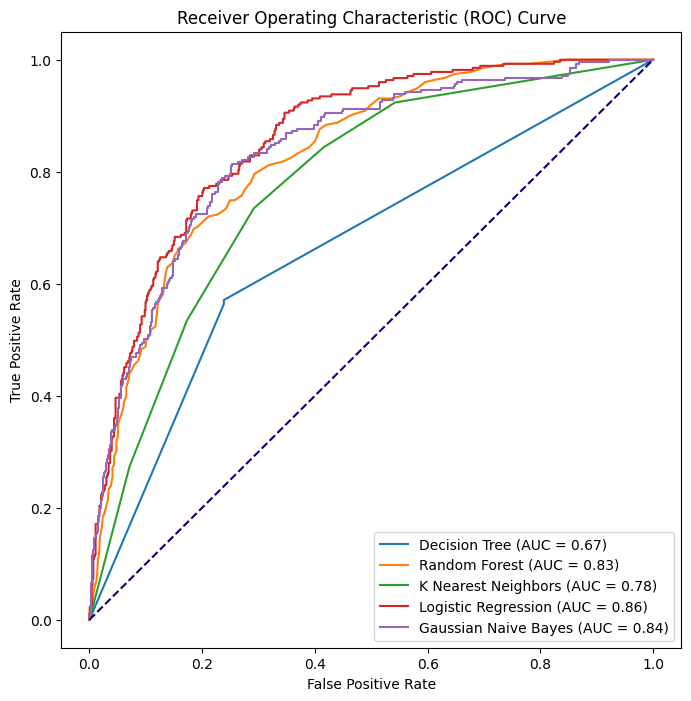

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a plot with subplots
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}

# Loop through models to plot ROC curves
for model_name, classifier in models.items():
    # Assuming 'preprocessor', 'SMOTE', 'selection' are defined earlier
    pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    # Fit the pipeline to training data
    pipeline.fit(X_train, y_train_encoded)

    # Get predicted probabilities for positive class
    y_score = pipeline.predict_proba(X_test)[:, 1]
    all_pipeline[model_name] = pipeline
    # Calculate ROC curve and AUC
    fpr, tpr, threshold= roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df =pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Add legend in the lower right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()


- **Decision Tree (AUC = 0.67):** Fair discriminative ability, but not as robust as more advanced models.
  
- **Random Forest (AUC = 0.82):** Shows good discriminative ability, performing well in distinguishing between positive and negative instances.

- **K Nearest Neighbors (AUC = 0.77):** Decent discriminative ability, falling between Decision Tree and Random Forest.

- **Logistic Regression (AUC = 0.86):** Excellent discriminative ability, demonstrating strong performance in classifying positive and negative instances.

- **Gaussian Naive Bayes (AUC = 0.84):** Strong discriminative ability, comparable to Logistic Regression.

The best-performing model based on AUC is **Logistic Regression**, as it has the highest AUC value (0.86), indicating superior performance in classification tasks.


In [81]:
# Checking the threshold
roc_curve_data['Random Forest'].tail(60)

,False Positive Rate,True Positive Rate,Threshold
46,0.108992,0.516364,0.570000
47,0.111717,0.520000,0.560000
48,0.117166,0.523636,0.550000
49,0.118529,0.538182,0.540000
50,0.119891,0.549091,0.530000
51,0.121253,0.563636,0.520000
52,0.123978,0.570909,0.510000
53,0.130790,0.581818,0.500000
54,0.133515,0.607273,0.490000
55,0.137602,0.629091,0.480000


. From above you can choose the threshold that aligns with the desired trade-off between precision and recall.

Confusion matrix to check performance of model

In [82]:

# Retrieve the 'Random Forest' pipeline

forest_pipeline = all_pipeline['Random Forest']  
# Make predictions using the pipeline
forest_y_pred = forest_pipeline.predict(X_test)  

# Calculate the confusion matrix
matrix = confusion_matrix(y_test_encoded, forest_y_pred)

# Print or use the 'matrix' variable as needed
print(matrix)


[[707  27]
 [248  27]]


**Interpretation:**

- The model correctly predicted the positive class in 24 instances.
- The model correctly predicted the negative class in 707 instances.
- The model predicted the positive class incorrectly in 27 instances.
- The model predicted the negative class incorrectly in 251 instances.

This confusion matrix suggests that the model may have challenges distinguishing between the classes, as indicated by a relatively high count of both False Positives and False Negatives. 

Adjusting classification thresholds to find a balance between precision and recall based on the objectives can improve model performance

<Axes: >

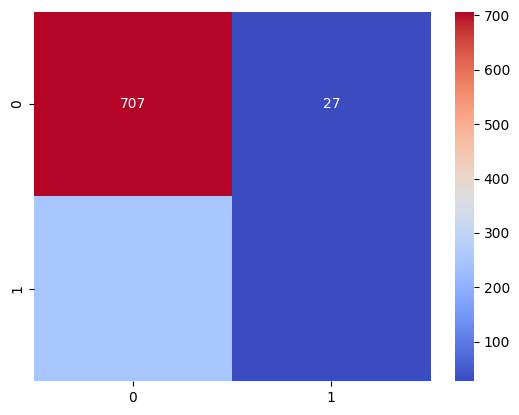

In [83]:
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

### Adjusting the threshold 

In [84]:

y_pred_proba = forest_pipeline.predict_proba(X_test)[:, 1]

# Set the threshold
threshold = 0.21

# Create binary predictions based on the threshold
binary_prediction = (y_pred_proba > threshold).astype(int)

# Calculate the confusion matrix with the threshold
threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)

# Print or use the 'threshold_matrix' variable as needed
print(threshold_matrix)


[[386 348]
 [ 33 242]]


### Business Impact

- **True Positives (242):** Model correctly identified customers likely to churn, enabling targeted retention strategies for these individuals.

- **False Positives (348):** Model incorrectly predicted churn for some customers, potentially leading to unnecessary interventions and additional costs.

- **True Negatives (386):** Model accurately identified customers not likely to churn, avoiding unnecessary interventions for stable customers.

- **False Negatives (33):** Model missed opportunities to identify actual churn risks, posing a risk of losing customers without timely intervention.


### Hyperparameter Tuning and Retraining with RandomizedSearchCV and GridSearchCV


### GridSearchCV

In [85]:

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [10, 30,50 ],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Create the grid search
grid_search = GridSearchCV(forest_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformation',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000024B5FBA9870>>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'Mon...
                                       ('feature_importance',
                                        SelectKBest(k=30,
                                                    score_func=<function mutual_info_classif at 0x0000024B5D9CCB80>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [10, 30, 50]},
             scoring='accuracy')

In [86]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)




Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 30}


### Train model using best parameters

In [87]:

# Define the pipeline with the RandomForest classifier
forest_pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_importance', selection),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid with the best parameters
best_params = {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

# Set the best parameters to the pipeline
forest_pipeline.set_params(**best_params)

# Fit the pipeline to the training data
forest_pipeline.fit(X_train, y_train_encoded)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000024B5FBA9870>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x0000024B5D9CCB80>)),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

#### Evaluation result

In [88]:
# Make predictions using the new pipeline
forest_y_pred_best = forest_pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, forest_y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       734
           1       0.61      0.65      0.63       275

    accuracy                           0.79      1009
   macro avg       0.74      0.75      0.74      1009
weighted avg       0.80      0.79      0.79      1009



In [89]:
prediction= forest_pipeline.predict(data_test)

In [90]:
prediction=label_encoder.inverse_transform(prediction)

In [92]:
data_test['Churn'] = prediction

In [94]:
data_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,No,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,3557-HTYWR,Female,No,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,No
1997,4816-JBHOV,Male,Yes,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
1998,8920-NAVAY,Male,Yes,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


### Model Persistence

In [98]:
# Model Persistence
import joblib
import os  # Import the os module

# Create the "models" directory if it doesn't exist
os.makedirs('./models', exist_ok=True)

# Save the trained model
joblib.dump(forest_pipeline, './models/finished_model.joblib')

# Save the label encoder
joblib.dump(label_encoder, './models/encoder.joblib')


['./models/encoder.joblib']

In [93]:
training_data.to_csv('training_data.csv', index=False)

